# 运营情况统计分析
## takingdata数据基本情况分析
> 该数据为takingdata提供的虚假欺诈点击数据，一共184903890行，数据集大小7.5GB

> 变量名词与相关解释如下：

* ip: ip address of click
* app: app id for marketing
* device: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)
* os: os version id of user mobile phone
* channel: channel id of mobile ad publisher
* click_time: timestamp of click (UTC)
* attributed_time: if user download the app for after clicking an ad, this is the time of the app download
* is_attributed: the target that is to be predicted, indicating the app was downloaded

**注意：**以上ip,app,device,os,channel都已经进行了转码处理

### 1.环境准备
**导入模块**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline

os.chdir("/home/hk/Documents/talkingData/mnt/ssd/kaggle-talkingdata2/competition_files")

**创建迭代器读取数据，并查看数据**

In [32]:
chunks = pd.read_csv('train.csv',  chunksize=2000000)

In [33]:
chunks.get_chunk(5)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0


**统计各离散变量unique数**

In [31]:
chunks = pd.read_csv('train.csv',  chunksize=2000000)
ip_set = set()
app_set = set()
channel_set = set()
os_set = set()
device_set = set()

print('programme start!')  
for chunk in chunks:
    
    ip_list = chunk['ip']
    app_list = chunk['app']
    channel_list = chunk['channel']
    os_list = chunk['os']
    device_list = chunk['device']

    ip_set = set(ip_list) | ip_set
    app_set = set(app_list) | app_set
    channel_set = set(channel_list) |channel_set
    os_set = set(os_list) | os_set
    device_set = set(device_list) | device_set
    i += 1
    

print("progamme over!")

programme start!
progamme over!


**输出离散变量unique count的结果**


In [35]:
unique_series = pd.Series()
unique_series['ip'] = len(ip_set)
unique_series['app'] = len(app_set)
unique_series['channel'] = len(channel_set)
unique_series['os'] = len(os_set)
unique_series['device'] = len(device_set)

unique_series
    

ip         277396
app           706
channel       202
os            800
device       3475
dtype: int64

In [40]:
per_click = 184903890./277396
per_click

666.570137997664

**说明：**四天时间一共277396个ip通过各种渠道进行了访问，平均ip点击次数：666.57

**绘制除ip外离散变量unique条行图**

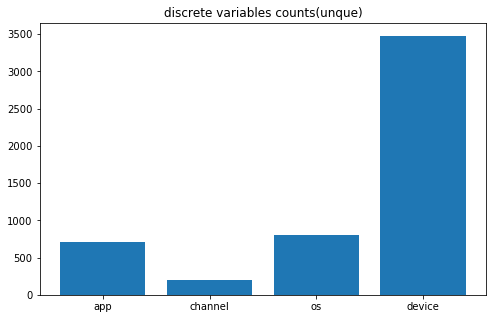

In [38]:
plt.figure(figsize=(8, 5))
plt.title('discrete variables counts(unque)')
unique_series = unique_series.drop('ip')
x = range(len(unique_series))
plt.bar(x, unique_series)
plt.xticks(x, unique_series.index)
plt.show()


**统计每一个ip访问次数**

In [53]:

chunks = pd.read_csv('train.csv',  chunksize=2000000)

ip_counts = pd.Series()

print('progamme start!')
for chunk in chunks:
    ip_c = chunk['ip'].value_counts()
    ip_counts = ip_counts.append(ip_c, ignore_index=False)

print('progamme end!')


"\nchunks = pd.read_csv('train.csv',  chunksize=2000000)\n\nip_counts = pd.Series()\n\nprint('progamme start!')\nfor chunk in chunks:\n    ip_c = chunk['ip'].value_counts()\n    ip_counts = ip_counts.append(ip_c, ignore_index=False)\n\nprint('progamme end!')\n"

In [52]:
ip_counts = ip_counts.groupby(ip_counts.index).sum()

**绘制累积分布图&频数分布直方图**

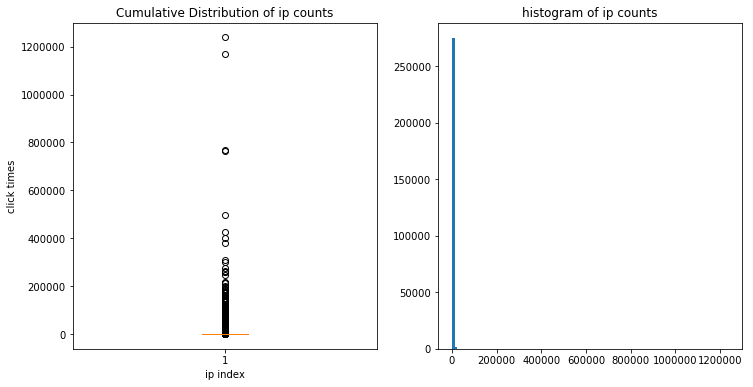

In [62]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Cumulative Distribution of ip counts')
plt.boxplot(ip_counts.values)
plt.ylabel('click times')
plt.xlabel('ip index')

plt.subplot(122)
plt.title('histogram of ip counts')
plt.hist(ip_counts, bins=100)
plt.show()

In [56]:
ip_counts.sort_values(ascending=True).head()

233017    1
310996    1
148143    1
310993    1
148150    1
dtype: int64

**修改变量名，使数据符合游戏场景**

**变量解释**

* player_id 玩家id
* device 玩家设备
* os 玩家系统
* login_time 登陆时间
* paid_time 付费时间
* is_paid 是否付费

## 2.数据预处理
**时间变量转换**

In [34]:
dataSet['click_time'] = pd.to_datetime(dataSet['click_time'], format='%Y-%m-%d  %H:%M:%S', errors='raise')

In [35]:
dataSet['attributed_time'] = pd.to_datetime(dataSet['attributed_time'], format='%Y-%m-%d  %H:%M:%S', errors='raise')

In [42]:
start_date = dataSet.click_time.min()
end_data = dataSet.click_time.max()
print('from {} to {}'.format(start_date, end_data))

from 2017-11-07 08:58:55 to 2017-11-09 00:05:39


数据最终为200w点击操作数据，时间区间为11-07， 到11-08两天

**检查缺失值个数**

In [37]:
for var in dataSet.columns:
    
    num_of_missing_value = sum(dataSet[var].isnull())
    print('num_of_missing_value in var :{} is {}'.format(var,str( num_of_missing_value)))

num_of_missing_value in var :ip is 0
num_of_missing_value in var :app is 0
num_of_missing_value in var :device is 0
num_of_missing_value in var :os is 0
num_of_missing_value in var :channel is 0
num_of_missing_value in var :click_time is 0
num_of_missing_value in var :attributed_time is 1995282
num_of_missing_value in var :is_attributed is 0


In [43]:
dataSet['ip'].value_counts()

5348      14430
5314      14206
73487      8565
73516      8394
53454      4707
114276     4335
26995      3804
95766      3431
100275     3276
201182     2954
105560     2897
137052     2876
105475     2864
17149      2719
43793      2716
49602      2679
209663     2530
111025     2303
5178       2142
86767      2063
5147       1888
93021      1818
45745      1704
84896      1655
48282      1643
93587      1608
77048      1604
93054      1583
75634      1582
119531     1581
          ...  
264766        1
39596         1
135933        1
133886        1
315430        1
271931        1
52900         1
339995        1
96402         1
86167         1
173807        1
303656        1
68764         1
215765        1
185062        1
267327        1
273464        1
302639        1
176363        1
213205        1
215252        1
3773          1
233165        1
216789        1
66205         1
238281        1
242379        1
226003        1
77979         1
4094          1
Name: ip, dtype: int64

In [40]:
dataSet.click_time.min()

Timestamp('2017-11-07 08:58:55')